In [1]:
import numpy as np
from scipy.io import wavfile
from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio

In [2]:
def to_decibels(x):
  return 10 * np.log10(x)


def plot_spectrogram(f, t, spectrum):
  plt.pcolormesh(t, f, to_decibels(spectrum))
  plt.show()

# Generating noise

### White noise

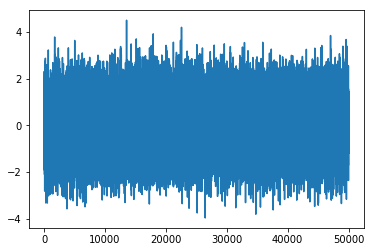

In [3]:
rate = 14440

white_noise = np.random.randn(50000)
plt.plot(range(white_noise.size), white_noise)
Audio(data=white_noise, rate=rate)

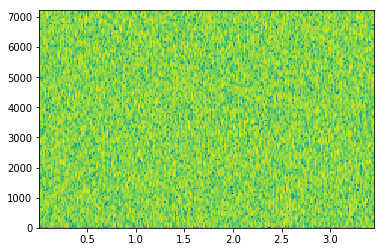

In [4]:
white_noise_spectrogram_data = signal.spectrogram(white_noise, fs=rate, window='blackman')

plot_spectrogram(*white_noise_spectrogram_data)

### Brownian noise

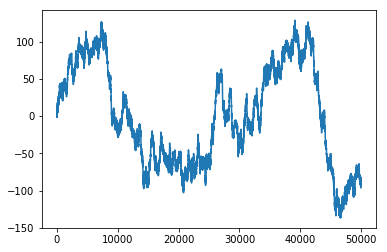

In [5]:
brown_noise = np.cumsum(np.random.randn(50000))
plt.plot(range(brown_noise.size), brown_noise)
Audio(data=brown_noise, rate=14440)

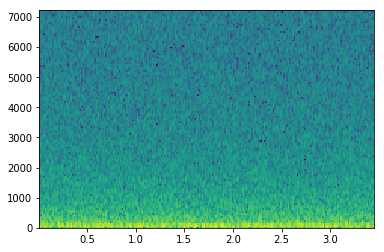

In [6]:
brown_noise_spectrogram_data = signal.spectrogram(brown_noise, fs=rate, window='blackman')

plot_spectrogram(*brown_noise_spectrogram_data)

# Generating noise with given Fourier transform

$\hat{f}$ - random binary vector

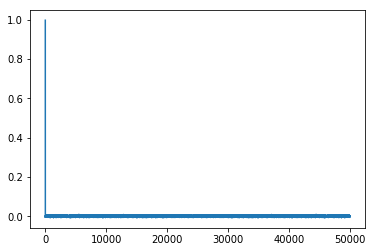

In [7]:
random_binary = np.random.binomial(2, p=0.5, size=50000)
random_binary = np.real(np.fft.ifft(random_binary))
plt.plot(range(random_binary.size), np.real(random_binary))
Audio(data=np.real(random_binary), rate=14440)

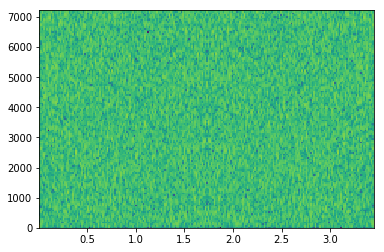

In [8]:
random_binary_spectrogram_data = signal.spectrogram(random_binary, fs=rate, window='blackman')

plot_spectrogram(*random_binary_spectrogram_data)

$\hat{f}$ - random normal vector

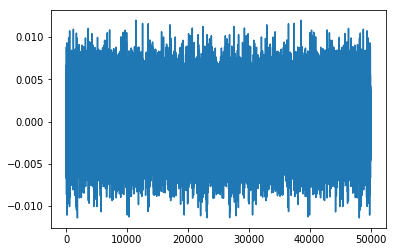

In [9]:
random_continuous = np.random.randn(50000)
x_random_frequency = np.real(np.fft.ifft(random_continuous))
plt.plot(range(x_random_frequency.size), x_random_frequency)
Audio(data=x_random_frequency, rate=14440)

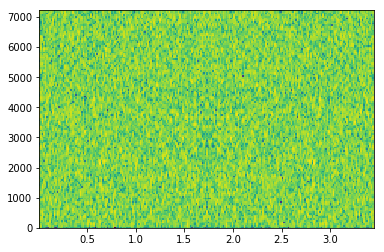

In [10]:
x_random_frequency_spectrogram_data = signal.spectrogram(x_random_frequency, fs=rate, window='blackman')

plot_spectrogram(*x_random_frequency_spectrogram_data)